# Predicting Radiation Levels

- ### Robert Murphy
- ### July 11,2021

-----

# Imports:

In [51]:
import pandas as pd
import numpy as np
import os

import seaborn as sns

import matplotlib.pyplot as plt
import math
import explore
import prepare


from scipy import stats
import explore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import decimal as d

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

-----


# Pre-Planning:

- 1.) Initial run through of the DS pipeline. Will provide a basic MVP.
- 2.) Start by acquire dataset utilizing pandas read_csv.
- 3.) Prep work will be basic dropping of nulls and not worrying about outliers, will see if any datatypes need to be changed.
- 4.) Investigate any missing values also.
- 5.) Explore the dataset on unscaled data, the target variable will be radiation, will utilize univariate, bivariate and multivar.
- 6.) Will utilize feature engineering to see which features will be useful in prediciton radiation level.
- 6.) Target is continous so this will be a regression model.
- 7.) Will utilize 4 models and compare the performance, 
- 8.) Will evaluate on unscaled train, validate datasets.
- 9.) Will evluate test on best performing model
- 10.) Present findings and give a conclusion.
- 11.) If time permits will go back and deal with outliers and scaling.


-------

# Executive Sumamry:
- 2nd Degree Polynomial model outperformed the baseline and the other models.
- Visual comparrison resulted in Tweedie Regressor Model being utilized on the test dataset.
- The Tweedie Regressor Model outperformed the baseline.

-----

# Acquire:

In [52]:
#uitlizing pandas read csv to create dataframe
df = pd.read_csv('SolarPrediction.csv')

In [53]:
#32686 records x 11 fields
df.shape

(32686, 11)

In [54]:
#datatypes are int, float, and object.
# Right away can see time and dates which will possibly need to be changed to different data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [55]:
#brief look at the data.
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [56]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


### Main Takeaways:
- Looking at the columns several of these will need to have th datatype changed.
- Radiation has a wide range of values, possibly outliers will need to be removed.
- Shape of the dataframe is 32686 Records x 11 Fields.
- Wind direction and time can be utilized in a bin. 

----

# Prepare:

In [57]:
explore.miss_dup_values(df)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [59]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [60]:
# will not utilize UNIXTime
df.drop(columns = 'UNIXTime', inplace = True)

In [61]:
# Data Needs to be renamed to Date
df.rename(columns = {'Data':'Date'}, inplace = True)

In [62]:
#added in column in datetime format, will convert these new columns to a hour and min then change to string and combine them.
df['Date'] = pd.to_datetime(df.Date)
df['Timehr'] = pd.to_datetime(df.Time).dt.hour
df['Timehr'] = df.Timehr.astype(str)
#######
df['Timemin'] = pd.to_datetime(df.Time).dt.minute
df['Timemin'] = df.Timemin.astype(str)
#######
df['Timesunhr'] = pd.to_datetime(df.TimeSunRise).dt.hour
df['Timesunmin'] = pd.to_datetime(df.TimeSunRise).dt.minute
df['Timesunhr'] = df.Timesunhr.astype(str)
df['Timesunmin'] = df.Timesunmin.astype(str)
#####
df['Timesethr'] = pd.to_datetime(df.TimeSunSet).dt.hour
df['Timesetmin'] = pd.to_datetime(df.TimeSunSet).dt.minute
df['Timesethr'] = df.Timesethr.astype(str)
df['Timesetmin'] = df.Timesetmin.astype(str)


In [63]:
#combining 
df['Time'] = (df.Timehr + '.' + df.Timemin)
df['TimeSunRise'] = (df.Timesunhr + '.' + df.Timesunmin)
df['TimeSunSet'] = (df.Timesethr + '.' + df.Timesetmin)

In [64]:
df.columns

Index(['Date', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet',
       'Timehr', 'Timemin', 'Timesunhr', 'Timesunmin', 'Timesethr',
       'Timesetmin'],
      dtype='object')

In [65]:
#dropping several columns
df.drop(columns = {'Timehr', 'Timemin', 'Timesunhr', 'Timesunmin', 'Timesethr',
       'Timesetmin'}, inplace = True)


In [66]:
cols = ['TimeSunRise', 'TimeSunSet', 'Time']

In [67]:
df[cols] = df[cols].astype(float)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    32686 non-null  datetime64[ns]
 1   Time                    32686 non-null  float64       
 2   Radiation               32686 non-null  float64       
 3   Temperature             32686 non-null  int64         
 4   Pressure                32686 non-null  float64       
 5   Humidity                32686 non-null  int64         
 6   WindDirection(Degrees)  32686 non-null  float64       
 7   Speed                   32686 non-null  float64       
 8   TimeSunRise             32686 non-null  float64       
 9   TimeSunSet              32686 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 2.5 MB


In [69]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-29,23.55,1.21,48,30.46,59,177.39,5.62,6.13,18.13
1,2016-09-29,23.50,1.21,48,30.46,58,176.78,3.37,6.13,18.13
2,2016-09-29,23.45,1.23,48,30.46,57,158.75,3.37,6.13,18.13
3,2016-09-29,23.40,1.21,48,30.46,60,137.71,3.37,6.13,18.13
4,2016-09-29,23.35,1.17,48,30.46,62,104.95,5.62,6.13,18.13


In [70]:
#creating new column which is day, if 0 then night, if 1 is day
df['day'] = np.where((df.Time < df.TimeSunSet) & (df.Time > df.TimeSunRise), 1, 0)
#dropping Sunset and Rise columns
df.drop(columns = ['TimeSunRise', 'TimeSunSet'],inplace = True)


In [71]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,day
0,2016-09-29,23.55,1.21,48,30.46,59,177.39,5.62,0
1,2016-09-29,23.50,1.21,48,30.46,58,176.78,3.37,0
2,2016-09-29,23.45,1.23,48,30.46,57,158.75,3.37,0
3,2016-09-29,23.40,1.21,48,30.46,60,137.71,3.37,0
4,2016-09-29,23.35,1.17,48,30.46,62,104.95,5.62,0


In [72]:
#binning degrees to have specificy wind direction
df['wind_direction'] = pd.cut(df['WindDirection(Degrees)'], [0,23,68,113,158,203,248,293,336,360], labels = ['N','NE','E','SE','S','SW','W','NW','N'], ordered = False)
df.drop(columns = 'WindDirection(Degrees)', inplace = True)

In [73]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction
0,2016-09-29,23.55,1.21,48,30.46,59,5.62,0,S
1,2016-09-29,23.50,1.21,48,30.46,58,3.37,0,S
2,2016-09-29,23.45,1.23,48,30.46,57,3.37,0,S
3,2016-09-29,23.40,1.21,48,30.46,60,3.37,0,SE
4,2016-09-29,23.35,1.17,48,30.46,62,5.62,0,E


In [74]:
df['time_of_day'] = pd.cut(df['Time'], [-0.01, 06.00, 10.00, 12.00,14.00,16.00,18.00,24.00], labels = ['0.00-06.00', '06.00-10.00','10.00-12.00','12.00-14.00','14.00-16.00','16.00-18.00','18.00--24.00'])


In [75]:
df[df.time_of_day.isna()]

,Date,Time,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day


In [76]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day
0,2016-09-29,23.55,1.21,48,30.46,59,5.62,0,S,18.00--24.00
1,2016-09-29,23.50,1.21,48,30.46,58,3.37,0,S,18.00--24.00
2,2016-09-29,23.45,1.23,48,30.46,57,3.37,0,S,18.00--24.00
3,2016-09-29,23.40,1.21,48,30.46,60,3.37,0,SE,18.00--24.00
4,2016-09-29,23.35,1.17,48,30.46,62,5.62,0,E,18.00--24.00


In [77]:
df.drop(columns = {'Time'}, inplace = True)

In [78]:
df.head()

,Date,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day
0,2016-09-29,1.21,48,30.46,59,5.62,0,S,18.00--24.00
1,2016-09-29,1.21,48,30.46,58,3.37,0,S,18.00--24.00
2,2016-09-29,1.23,48,30.46,57,3.37,0,S,18.00--24.00
3,2016-09-29,1.21,48,30.46,60,3.37,0,SE,18.00--24.00
4,2016-09-29,1.17,48,30.46,62,5.62,0,E,18.00--24.00


In [79]:
def create_dummies(df):
    '''
    This function is used to create dummy columns for my non binary columns
    '''
    # create dummies for payment_type, internet_service_type, and contract_type
    time_dummies = pd.get_dummies(df.time_of_day, drop_first=False)
    wind_dummies = pd.get_dummies(df.wind_direction, drop_first=False)
    

    # now we concatenate our dummy dataframes with the original
    df = pd.concat([df, time_dummies], axis=1)
    df = pd.concat([df, wind_dummies], axis=1)
    

    return df

In [80]:
df =create_dummies(df)

In [81]:
df.drop(columns = ['wind_direction', 'time_of_day'], inplace = True)

In [82]:
train, validate, test = prepare.split_continuous(df)

train -> (18303, 22)
validate -> (7845, 22)
test -> (6538, 22)


### Main Takeaways:

- Did not need to drop any nulls, or values.
- Decided to not deal with outliers and will leave them.
- Converted several columns to different datatypes, mainly dates was changed to datetime, then converted to obj to be combined to a float.
- Created a new column called day which states if the record was during the day with 1 being yes and 0 being no.
- Binned wind direction degrees into N,NE,S,SE,SW,W, NW,W.
- Binned time_of_day into time frames.




-------

# Explore:

In [83]:
train.columns

Index(['Date', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'Speed',
       'day', '0.00-06.00', '06.00-10.00', '10.00-12.00', '12.00-14.00',
       '14.00-16.00', '16.00-18.00', '18.00--24.00', 'E', 'N', 'NE', 'NW', 'S',
       'SE', 'SW', 'W'],
      dtype='object')

In [84]:
quant_vars = ['Temperature', 'Pressure', 'Humidity', 'Speed']
cat_vars = ['day','0.00-06.00', '06.00-10.00', '10.00-12.00', '12.00-14.00',
       '14.00-16.00', '16.00-18.00', '18.00--24.00', 'E', 'N', 'NE', 'NW', 'S',
       'SE', 'SW', 'W']


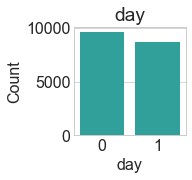

   day  Count  Percent
0    0   9629    52.61
1    1   8674    47.39
_________________________________________________________________


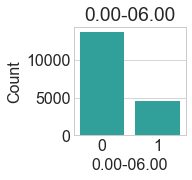

   0.00-06.00  Count  Percent
0           0  13704    74.87
1           1   4599    25.13
_________________________________________________________________


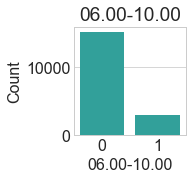

   06.00-10.00  Count  Percent
0            0  15246     83.3
1            1   3057     16.7
_________________________________________________________________


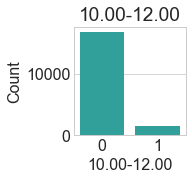

   10.00-12.00  Count  Percent
0            0  16818    91.89
1            1   1485     8.11
_________________________________________________________________


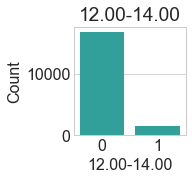

   12.00-14.00  Count  Percent
0            0  16829    91.95
1            1   1474     8.05
_________________________________________________________________


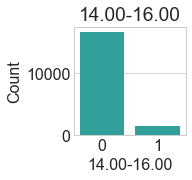

   14.00-16.00  Count  Percent
0            0  16740    91.46
1            1   1563     8.54
_________________________________________________________________


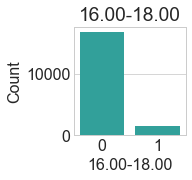

   16.00-18.00  Count  Percent
0            0  16801    91.79
1            1   1502     8.21
_________________________________________________________________


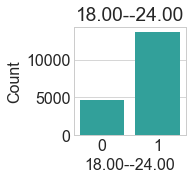

   18.00--24.00  Count  Percent
0             1  13680    74.74
1             0   4623    25.26
_________________________________________________________________


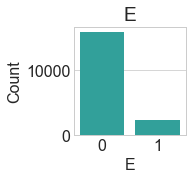

   E  Count  Percent
0  0  15893    86.83
1  1   2410    13.17
_________________________________________________________________


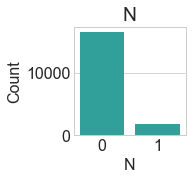

   N  Count  Percent
0  0  16524    90.28
1  1   1779     9.72
_________________________________________________________________


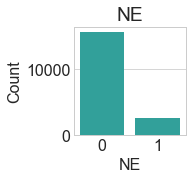

   NE  Count  Percent
0   0  15694    85.75
1   1   2609    14.25
_________________________________________________________________


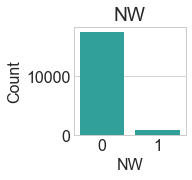

   NW  Count  Percent
0   0  17449    95.33
1   1    854     4.67
_________________________________________________________________


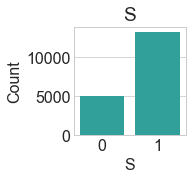

   S  Count  Percent
0  1  13223    72.24
1  0   5080    27.76
_________________________________________________________________


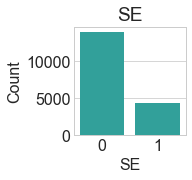

   SE  Count  Percent
0   0  13959    76.27
1   1   4344    23.73
_________________________________________________________________


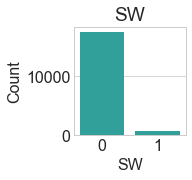

   SW  Count  Percent
0   0  17564    95.96
1   1    739     4.04
_________________________________________________________________


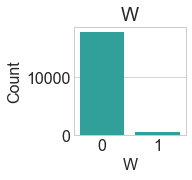

   W  Count  Percent
0  0  17815    97.33
1  1    488     2.67
_________________________________________________________________


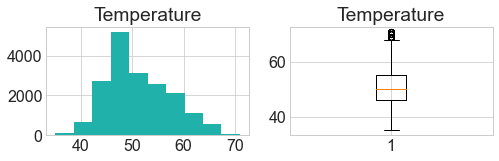

count    18303.000000
mean        51.062012
std          6.166756
min         35.000000
25%         46.000000
50%         50.000000
75%         55.000000
max         71.000000
Name: Temperature, dtype: float64


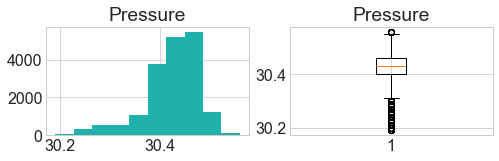

count    18303.000000
mean        30.423053
std          0.054653
min         30.190000
25%         30.400000
50%         30.430000
75%         30.460000
max         30.560000
Name: Pressure, dtype: float64


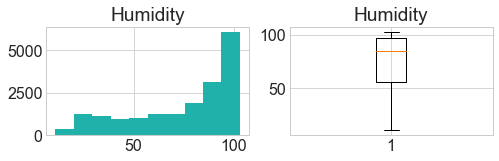

count    18303.000000
mean        74.960116
std         25.955723
min         11.000000
25%         56.000000
50%         85.000000
75%         97.000000
max        103.000000
Name: Humidity, dtype: float64


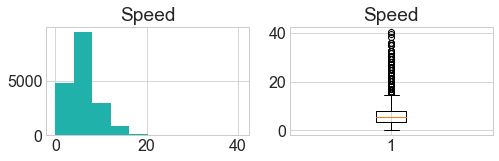

count    18303.000000
mean         6.256079
std          3.477974
min          0.000000
25%          3.370000
50%          5.620000
75%          7.870000
max         40.500000
Name: Speed, dtype: float64


In [85]:
#univariate exploration of each feature including target
explore.explore_univariate(train, cat_vars, quant_vars)

<AxesSubplot:xlabel='Radiation', ylabel='Temperature'>

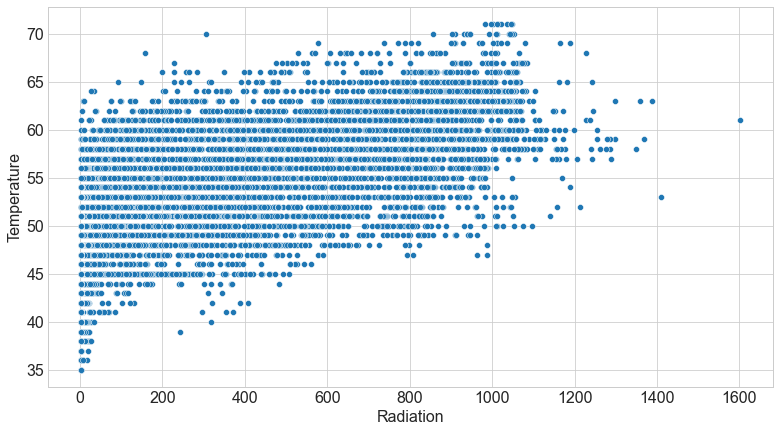

In [86]:
# looking at relationship of continous vs contiunous.
sns.scatterplot(x = "Radiation", y = 'Temperature', data = train)

<AxesSubplot:xlabel='Radiation', ylabel='Speed'>

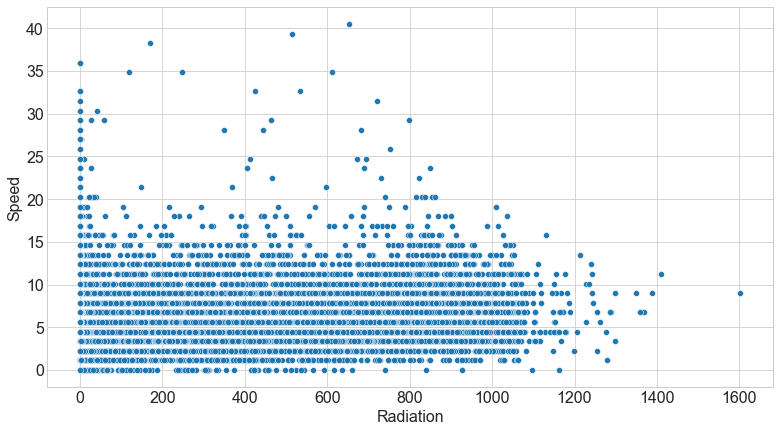

In [87]:
# relationship between continous vs continous
sns.scatterplot(x = "Radiation", y = 'Speed', data = train)

<AxesSubplot:xlabel='Radiation', ylabel='Pressure'>

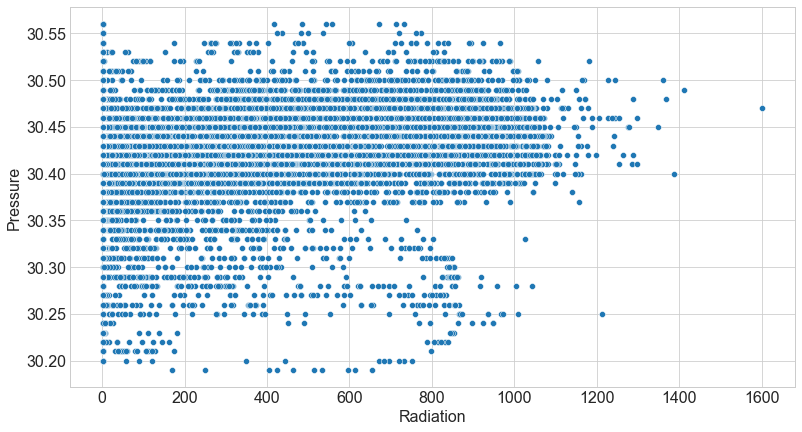

In [88]:
#relationship between continous vs continous
sns.scatterplot(x = "Radiation", y = 'Pressure', data = train)

<AxesSubplot:xlabel='Radiation', ylabel='Humidity'>

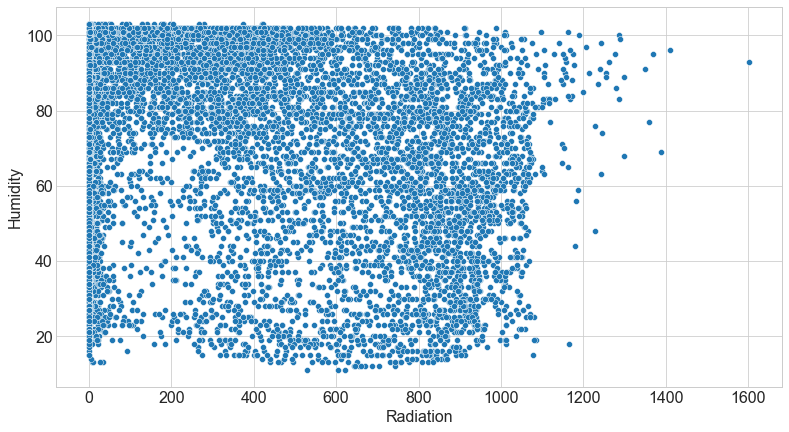

In [89]:
#relationship between continous vs continous
sns.scatterplot(x = "Radiation", y = 'Humidity', data = train)

<AxesSubplot:title={'center':'Feautures  Correlating with Radiation'}>

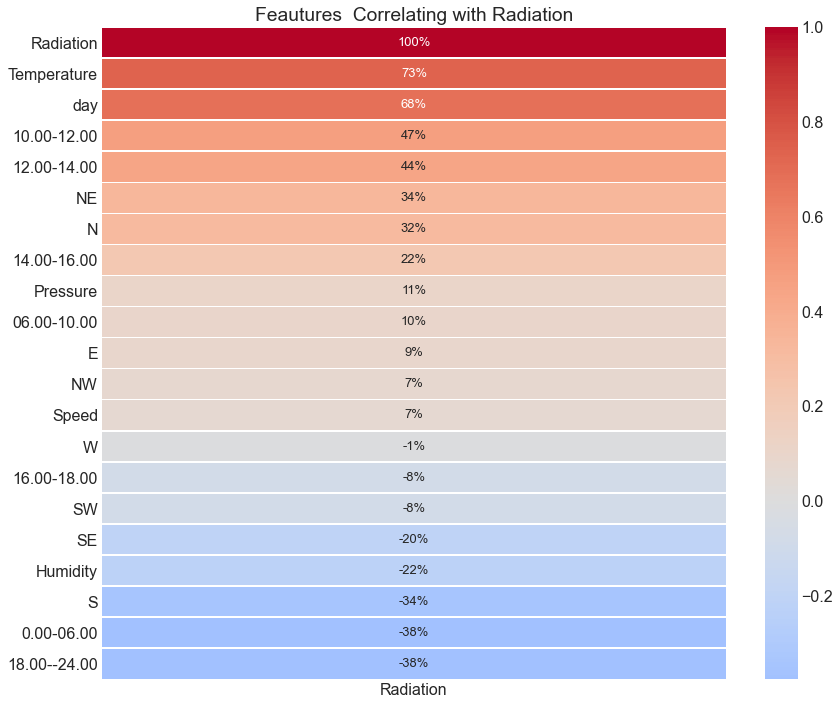

In [90]:
explore.get_heatmap(train, "Radiation")

### Main Takeaways:

- Temperature is the only feature which visually appears normally distributed.
- Can see there is a linear correlation between raditaion vs. temperature and radiation vs.pressure.
- Heatmap indicates several fatures have a decent correlation value to the target.
- Will utilize features which have correlation value of 20% or greater.

------

# Statistical Tests:

### Pearson Correlation:

 Pearson correlation coefficient is 0.7339918787048912, the corresponding p value is 0.0.
 We reject the null, and accept HA: there is a relationship between total_squareft and assessment_value


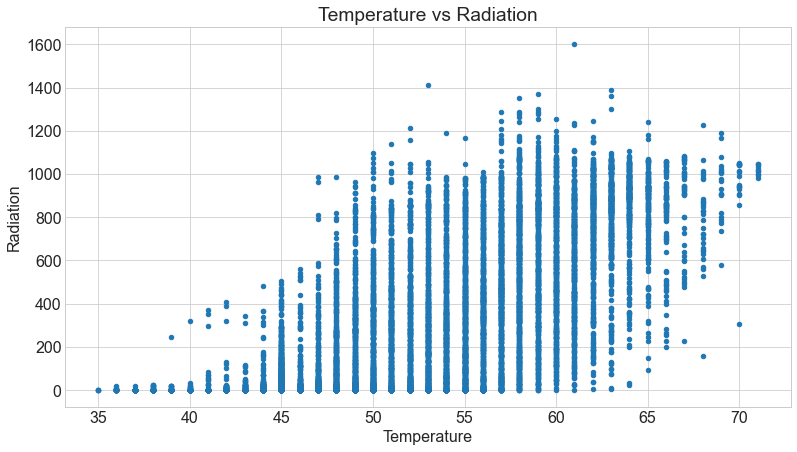

In [91]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Radiation and Temperature'

alpha = 0.05

corr, p = stats.pearsonr(train.Temperature, train.Radiation)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Temperature', 'Radiation')
plt.title('Temperature vs Radiation')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship between total_squareft and assessment_value')
else:
    print(f' We accept null,  {Hypothesis_null}.')



 Pearson correlation coefficient is -0.21761642658167, the corresponding p value is 4.3005689237312125e-195.
 We reject the null, and accept HA: there is a relationship


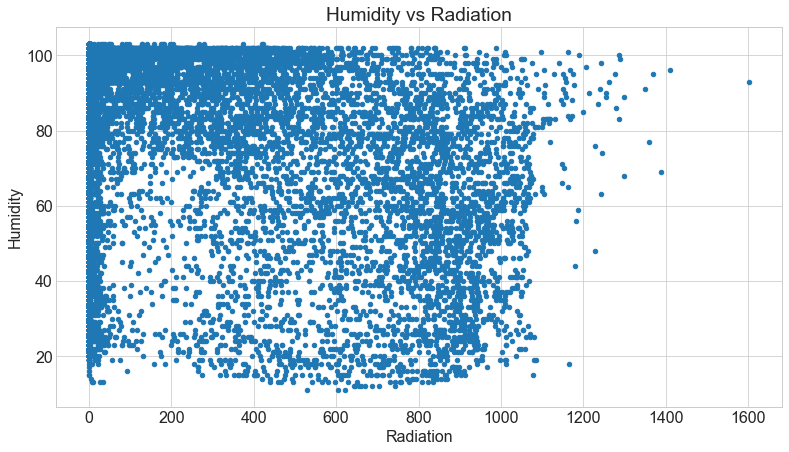

In [92]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Radiation and Humidity'

alpha = 0.05

corr, p = stats.pearsonr(train.Humidity, train.Radiation)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Radiation', 'Humidity')
plt.title('Humidity vs Radiation')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship')
else:
    print(f' We accept null,  {Hypothesis_null}.')

 Pearson correlation coefficient is 0.106915687783673, the corresponding p value is 1.1251486078240107e-47.
 We reject the null, and accept HA: there is a relationship


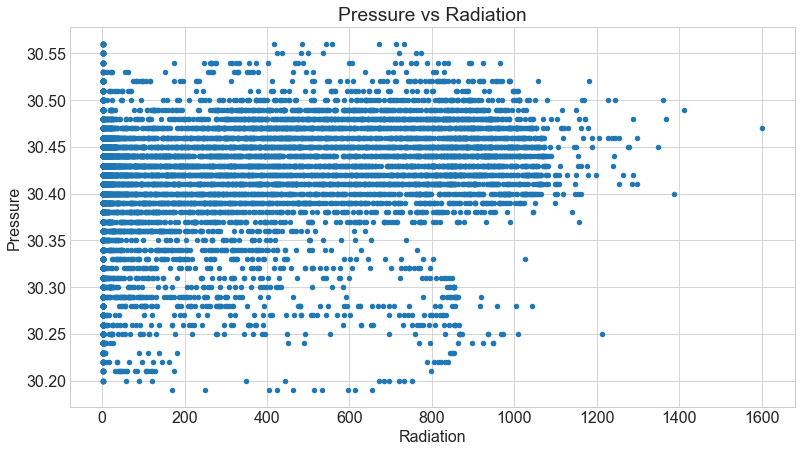

In [93]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Radiation and Pressure'

alpha = 0.05

corr, p = stats.pearsonr(train.Pressure, train.Radiation)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Radiation', 'Pressure')
plt.title('Pressure vs Radiation')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship')
else:
    print(f' We accept null,  {Hypothesis_null}.')

### TTest

In [94]:
#TTest
# make a subset 
x1 = train[train['10.00-12.00'] == 1].Radiation
x2 = train[train['10.00-12.00'] != 1].Radiation


# run a 2 sample, t-test
t_stat, p = stats.ttest_ind(x1,x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no difference in radiation levels for timeframe 10:00-12:00 and not in the timeframe 10:00-12:00'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 72.2607
p_value = 0.0000

We can reject the null hypothesis that There is no difference in radiation levels for timeframe 10:00-12:00 and not in the timeframe 10:00-12:00


In [95]:
#TTest
# make a subset 
x1 = train[train['10.00-12.00'] == 1].Radiation
x2 = train[train['06.00-10.00'] == 1].Radiation


# run a 2 sample, t-test
t_stat, p = stats.ttest_ind(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no difference in radiation levels for time 10:00-12:00 and 06.00-10.00'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 49.4591
p_value = 0.0000

We can reject the null hypothesis that There is no difference in radiation levels for time 10:00-12:00 and 06.00-10.00


In [96]:
#TTest
# make a subset 
x = N_wind_radiation = train[train.N == 1].Radiation
x1 = overall_radiation_mean = train.Radiation.mean()


# run a 1 sample, t-test
t_stat, p = stats.ttest_1samp(x,x1)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is significant difference in radiation levels for winds blowing N and the overal population mean.'

if p/2 < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 36.3075
p_value = 0.0000

We can reject the null hypothesis that There is significant difference in radiation levels for winds blowing N and the overal population mean.


In [97]:
#will only utilize features with 20% correlation or better.



### Main Takeaways:
- Investigated if several continuous features had a linear correlation with the continuous.
- For each pearson r test, the null hypothesis was rejected.
- Investigated the categorical variables with the continuous variable target, utilized a Ttest.
- For each Ttest the null hypotheis was rejected.
- The results from the tests performed lead to the conclusion that a majority of the features would be useful in modeling.

# Modeling:

In [98]:
#specifying target and cols
cols = ['Temperature', 'Pressure', 'Humidity', 'Speed',
       'day', '0.00-06.00', '06.00-10.00',
       '10.00-12.00', '12.00-14.00', '14.00-16.00',
       '18.00--24.00','E', 'N', 'NE','S',
       'SE']
target = 'Radiation'

In [99]:
#creating X-train which includes features with target excluded. Did the same for test and validate
X_train, y_train = train[cols], train[target]
X_validate, y_validate = validate[cols], validate[target]
X_test, y_test = test[cols], test[target]

-----

## Baseline Mean or Median Utilization

In [126]:
# y_train and y_validate have to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict radiation_pred_mean
radiation_pred_mean = y_train.Radiation.mean()
y_train['radiation_pred_mean'] = radiation_pred_mean
y_validate['radiation_pred_mean'] = radiation_pred_mean 

# 2. compute radiation_pred_median
radiation_median = y_train.Radiation.median()
y_train['radiation_pred_med'] = radiation_median
y_validate['radiation_pred_med'] = radiation_median 

#Evaluate the baseline model using the mean
#RMSE of radiation_pred_mean
baseline_RMSE = mean_squared_error(y_train.Radiation, y_train.radiation_pred_mean) ** .5
baseline_val_RMSE = mean_squared_error(y_validate.Radiation, y_validate.radiation_pred_mean) ** .5

print("RMSE using Mean\nTrain/In-Sample: ", round(baseline_RMSE, 2),
      "\nValidate/Out-of-Sample: ", round(baseline_val_RMSE, 2))

#Evaluate the baseline model using the median
#RMSE of log_error_pred_mean
baseline_rmse_train_median = mean_squared_error(y_train.Radiation, y_train.radiation_pred_med) ** .5
baseline_rmse_validate_median = mean_squared_error(y_validate.Radiation, y_validate.radiation_pred_med) ** .5

print("RMSE using Median\nTrain/In-Sample: ", round(baseline_rmse_train_median, 2), 
      "\nValidate/Out-of-Sample: ", round(baseline_rmse_validate_median, 2))

RMSE using Mean
Train/In-Sample:  314.24 
Validate/Out-of-Sample:  313.88
RMSE using Median
Train/In-Sample:  373.73 
Validate/Out-of-Sample:  374.43


## Baseline Prediction

In [101]:
# Baseline prediction will utilize mean, RMSE value for mean was better than median.
# Have stated our baseline accuracy for the model to beatr in order to be considered valid.
baseline = y_train.Radiation.mean()
y_train['baseline'] = baseline

In [125]:
# Baseline RMSE calculation.
baseline_RMSE = math.sqrt(mean_squared_error(y_train.Radiation, y_train.baseline))
print(f'Train RMSE Baseline {round(baseline_RMSE,2)}.')

Train RMSE Baseline 314.24.


### Baseline Takeaways:
- Mean and median RMSE values are not equal, will set baseline to Radiation mean. 

-----

## Model 1: Linear Regression

In [124]:
# create the model object
linear_model = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
linear_model.fit(X_train, y_train.Radiation)

# predict train
y_train['radiation_predict_lm'] = linear_model.predict(X_train)

# evaluate: rmse
rmse_train_lr = mean_squared_error(y_train.Radiation, y_train.radiation_predict_lm)**(1/2)

# predict validate
y_validate['radiation_predict_lm'] = linear_model.predict(X_validate)

# evaluate: rmse
rmse_validate_lr = mean_squared_error(y_validate.Radiation, y_validate.radiation_predict_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train_lr,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate_lr,2),
      "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_lr = explained_variance_score(y_train.Radiation, y_train.radiation_predict_lm)
print('Explained Variance Linear Regression Model = ', round(evs_lr,2))

RMSE for OLS using LinearRegression
Training/In-Sample:  148.88 
Validation/Out-of-Sample:  146.91 
Baseline RMSE value is  314.24
Explained Variance Linear Regression Model =  0.78


### OLS Linear Regression Model Takeaway:
- The RMSE values for the training and validate differ by 2 Wm^2, indicates slightly overfit.
- So due to the RMSE value representing watts, I feel comfortable in saying this is an exceptable model.
- Train out performed the baseline, as did the validate, so the model is valid and useful in predicting radiation level.

## Model 2 : Polynomial

In [104]:
# make the polynomial features to get a new set of features
poly_feat = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = poly_feat.fit_transform(X_train)

# transform X_validate & X_test
X_validate_degree2 = poly_feat.transform(X_validate)
X_test_degree2 = poly_feat.transform(X_test)

X_train_degree2.shape, X_validate_degree2.shape, X_test_degree2.shape

((18303, 153), (7845, 153), (6538, 153))

In [122]:
# create the model object
linear_model2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
linear_model2.fit(X_train_degree2, y_train.Radiation)

# predict train
y_train['radiation_predict_linear_model2'] = linear_model2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_poly = mean_squared_error(y_train.Radiation, y_train.radiation_predict_linear_model2)**(1/2)

# predict validate
y_validate['radiation_predict_linear_model2'] = linear_model2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_poly = mean_squared_error(y_validate.Radiation, y_validate.radiation_predict_linear_model2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", round(rmse_train_poly,2),
      "\nValidation/Out-of-Sample: ", round(rmse_validate_poly,2), 
      "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_poly = explained_variance_score(y_train.Radiation, y_train.radiation_predict_linear_model2)
print('Explained Variance Polynomial Model = ', round(evs_poly,2))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  126.25 
Validation/Out-of-Sample:  124.24 
Baseline RMSE value is  314.24
Explained Variance Polynomial Model =  0.84


### Polynomial Model Takeaway:
    
- Polynomial performed better than regression.
- Model is slightly overfit but the model performed better than the baseline so it is valid.

## Model 3: Lasso Lars 

In [117]:
# create the model object
lars_model = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars_model.fit(X_train, y_train.Radiation)

# predict train
y_train['radiation_prediction_lars'] = lars_model.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.Radiation, y_train.radiation_prediction_lars)**(1/2)

# predict validate
y_validate['radiation_prediction_lars'] = lars_model.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.Radiation, y_validate.radiation_prediction_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train_lars,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate_lars,2),
      "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_lars = explained_variance_score(y_train.Radiation, y_train.radiation_prediction_lars)
print('Explained Variance Linear Regression Model = ', round(evs_lars,3))

RMSE for Lasso + Lars
Training/In-Sample:  244.42 
Validation/Out-of-Sample:  243.32 
Baseline RMSE value is  314.24
Explained Variance Linear Regression Model =  0.395


### Lasso Lars Model Takeaway:
    
- Lasso Lars is the worst performing model so far.
- Model is slightly overfit but the model performed better than the baseline so it is valid.

## Model 4: Tweedie Regressor

In [118]:
# create the model object
glm = TweedieRegressor(alpha=0, power = 1)

# fit the model to our training data. 
glm.fit(X_train, y_train.Radiation)


# predict train
y_train['radiation_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Radiation, y_train.radiation_pred_glm) ** (1/2)


# predict validate
y_validate['radiation_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.Radiation, y_train.radiation_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", round(rmse_train,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,2),
     "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_glm = explained_variance_score(y_train.Radiation, y_train.radiation_pred_glm)
print('Explained Variance Linear Regression Model = ', round(evs_glm,3))

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  144.04 
Validation/Out-of-Sample:  144.04 
Baseline RMSE value is  314.24
Explained Variance Linear Regression Model =  0.79


### Tweedie Regressor Model Takeaway:
    
- Polynomial performed better than the Tweedie Regressor by 20 Wm^2.
- Model is was not overfit and performed better than the baseline.

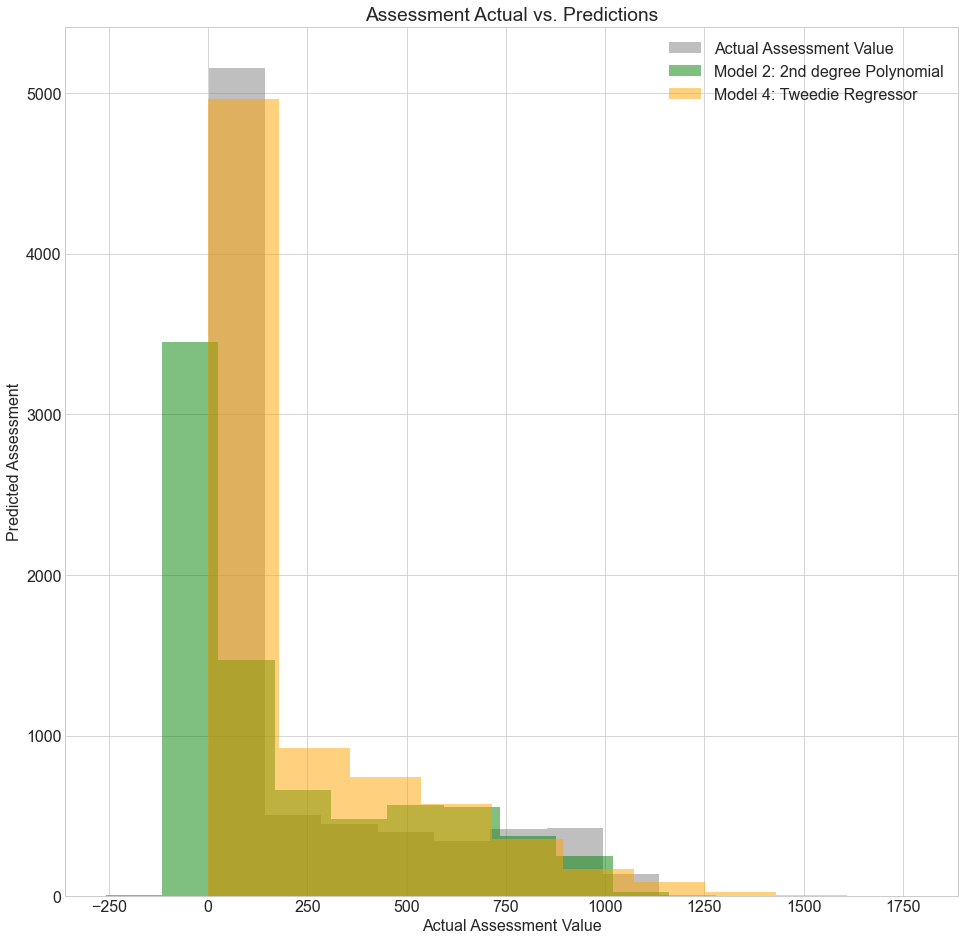

In [128]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,16))
plt.hist(y_validate.Radiation, color='grey', alpha=.5, label="Actual Assessment Value")
plt.hist(y_validate.radiation_predict_linear_model2, alpha=.5, color="green", label="Model 2: 2nd degree Polynomial")
plt.hist(y_validate.radiation_pred_glm, alpha=.5, color="orange", label="Model 4: Tweedie Regressor")
plt.xlabel("Actual Assessment Value")
plt.ylabel("Predicted Assessment")
plt.title("Assessment Actual vs. Predictions")
plt.legend()
plt.show()

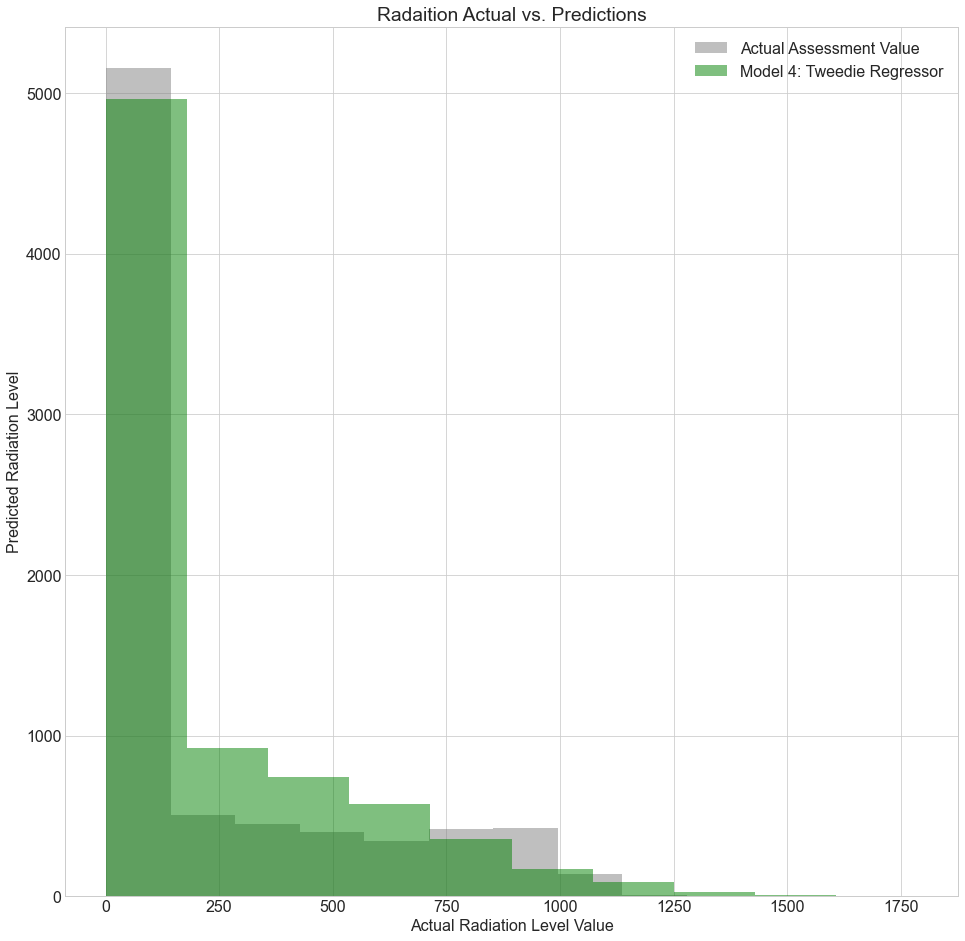

In [127]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,16))
plt.hist(y_validate.Radiation, color='grey', alpha=.5, label="Actual Assessment Value")

plt.hist(y_validate.radiation_pred_glm, alpha=.5, color="green", label="Model 4: Tweedie Regressor")

plt.xlabel("Actual Radiation Level Value")
plt.ylabel("Predicted Radiation Level")
plt.title("Radaition Actual vs. Predictions")
plt.legend()
plt.show()

## Main Takeaway:
- The best perfoming model was the Tweedie Regressor.
- The model was not overfit with a train: 144 Wm^2 and validate 144Wm^2.
- The last visualization show that Tweedie Regressor has the best fit to the actual.
- Will evaluate on the test dataset using Tweedie Regressor.



----

# Evaluate on Test:

In [78]:
# create the model object
# predict train
# create dataframe
y_test = pd.DataFrame(y_test)
# use the model to make predictions
y_test['radiation_predict_test_glm'] = glm.predict(X_test)

# evaluate: rmse
rmse_test_poly = mean_squared_error(y_test.Radiation, y_test.radiation_predict_test_glm)**(1/2)


print("\nTest/Out-of-Sample: ", rmse_test_poly,
      "\nBaseline RMSE value is ", baseline_RMSE)
evs_poly_test = explained_variance_score(y_test.Radiation, y_test.radiation_predict_test_glm)
print('Explained Variance Polynomial Model = ', round(evs_poly_test,3))






Test/Out-of-Sample:  147.2012581645077 
Baseline RMSE value is  314.23816485288734
Explained Variance Polynomial Model =  0.792


## Main Takeaway:
- The model outperformed the baseline, so the model is valid.


----

# Conclusions:

- Utilized features which had a correlation value >= 20% within a model to predict radiation levels.
- 2nd Degree Polynomial had lowest validate RMSE value: 124 Wm^2 and performed better than the baseline. However after reviewing the visualizations of the models against the actual, came to the conclusion that Polynomial was overfitting and decided upon Tweedie Regressor.
- Evaluted the test dataset on the Tweedie Regressor Model, the model performed better than the baseline.
- With more time, further feature engineering, and the removal of outliers the performance of the model could be imporved. 
